12:42:38 - cmdstanpy - INFO - Chain [1] start processing
12:42:40 - cmdstanpy - INFO - Chain [1] done processing


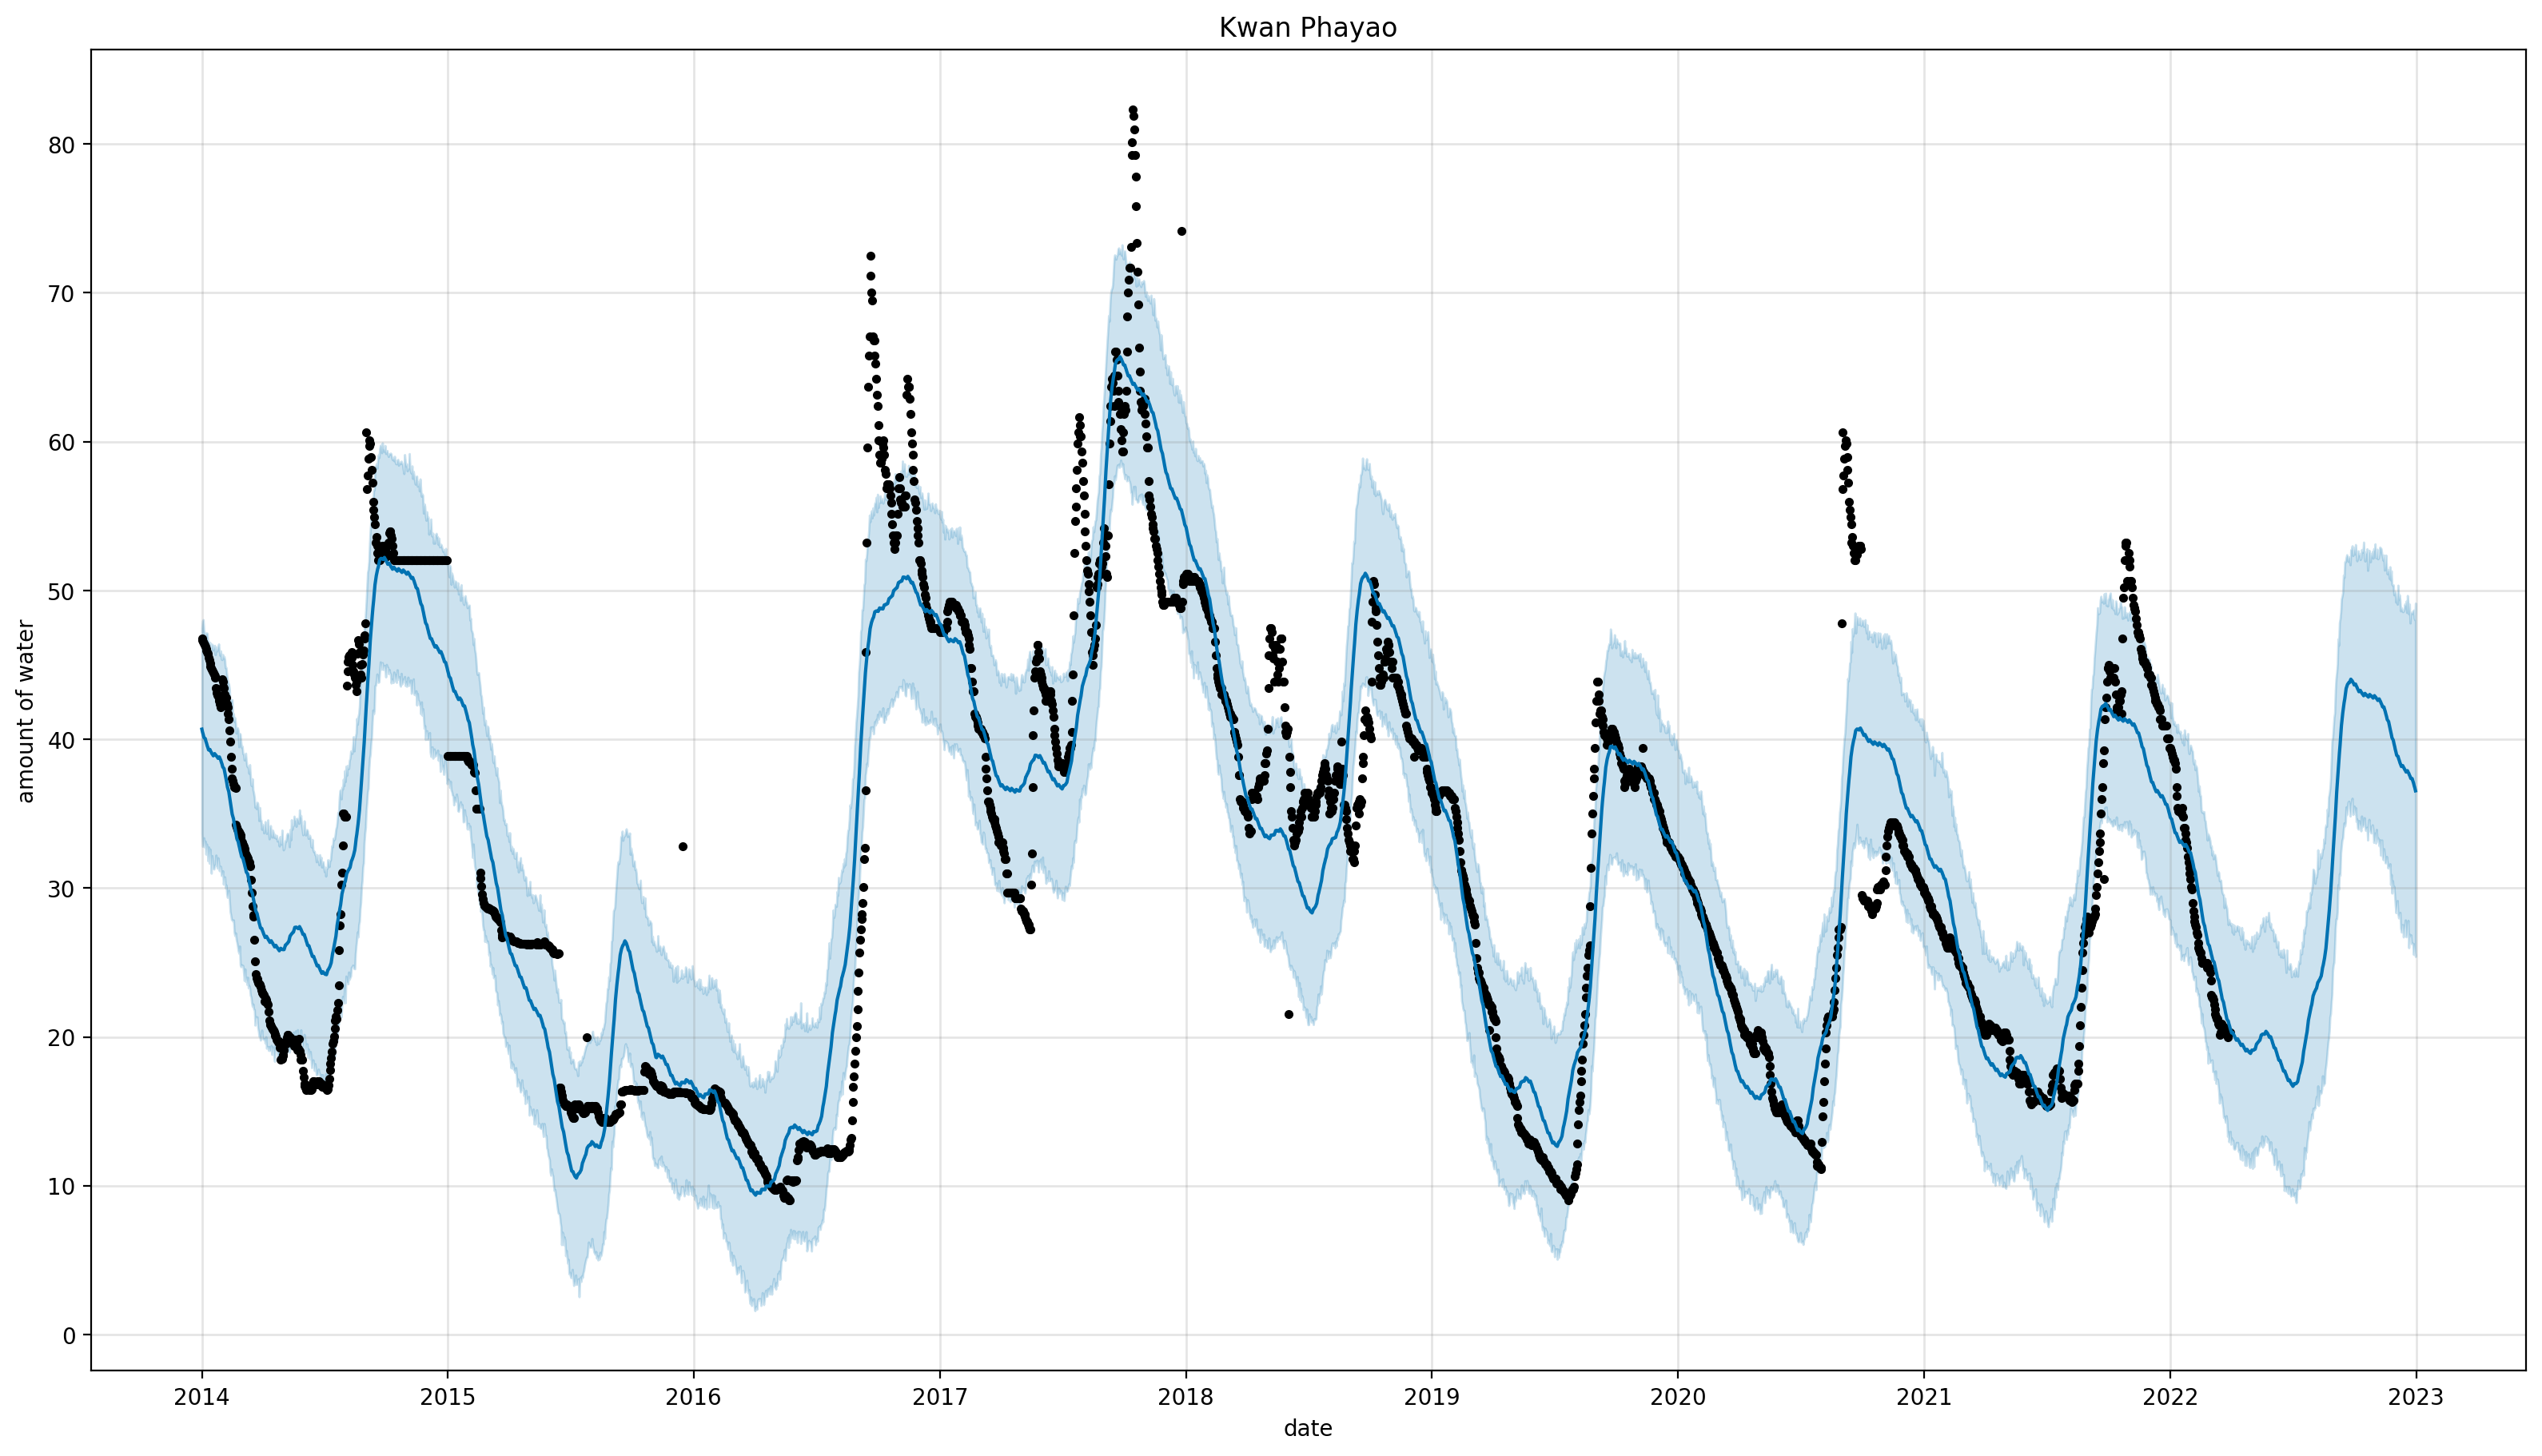

In [8]:
import sys
import pandas as pd
import seaborn as sns
import numpy as py
import matplotlib.pyplot as plt

from prophet import Prophet
# import codecs
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import base64
from io import BytesIO

%matplotlib inline
%config InlineBackend.figure_format='retina'

file = open('water_detail.csv')
data= pd.read_csv(file, parse_dates=['date'], skipinitialspace=True)
data=data.sort_values('date').reset_index(drop=True).copy()
y_col='aow'
data.dropna(subset=[y_col], inplace=True)
df=data[['date', y_col]]
df.columns=['ds','y']
model=Prophet()
model.fit(df)
future=model.make_future_dataframe(periods=275, freq='D')
forecast=model.predict(future)
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dt=pd.merge(df, dfcst, left_on='ds', right_on='ds')
dt.shape
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date', ylabel='amount of water')
plt.title(f'Kwan Phayao')
plt.savefig('img/graphforecast.png')